# Witful ML 02 - Simple Linear Regression
by Kaan Kabalak, Editor In Chief @ witfuldata.com

# Introduction

Welcome to the second chapter of the Witful ML series. In this chapter we will learn about the following:

* The logic behind linear regression
* Instantiating a linear regression model (and what that actually means)
* Model fitting (and what that actually means)
* Making predictions with models

As I have mentioned at the end of the first chapter, we will build two different models for two different variables.

## Importing & Data Frame

In [1]:
#Importing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Forming a data frame
auto_df = pd.read_csv("auto.csv")

In [3]:
auto_df.head(5)

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [4]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   displ   392 non-null    float64
 2   hp      392 non-null    int64  
 3   weight  392 non-null    int64  
 4   accel   392 non-null    float64
 5   origin  392 non-null    object 
 6   size    392 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 21.6+ KB


# Simple Linear Regression

What is simple linear regression?

Let's say we you know the height and the weight of 200 people. As their height goes up, their weight probably goes up too, right? You study how height affects weight. After enough studying (and learning), you decide that you know enough. When you hear about the height of a person, you can now make a prediction about his/her weight. Of course, you will still make some mistakes. Yet, after studying height-weight relation for so many people, your guesses will be much better than someone randomly guessing it.

Simple Linear Regression is just that. You have an independent feature variable (X), you have a dependent target variable (y) and there are the mistakes you make when you try to use height info to predict weight (error). You study how X affects y, so that you can more accurately predict y when you only have X in the future.

Now let's see how we can make this work in Python. We will use data on engine displacement of cars' to predict their horsepower. The scikit learn library will enable us to make the linear regression algorithm work with only a few lines of code. Let's begin!

## Understanding linear regression visually

Before we actually insatiate the model and fit it to make predictions, I want to show you visually what linear regression is.


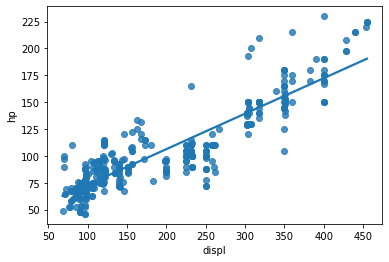

In [5]:
#Seaborn regplot
sns.regplot(x="displ",y="hp",data=auto_df,ci=None)
plt.show()

Every blue dot you see here is made up of two variable values (x,y). For example, when engine displacement of a car was 150, its horsepower was 125, and the scatterplot put a blue dot there. This shows us how x and y are correlated.

You see that blue line going thorugh the data points of the scatter plot? That's a regression line. The model will try to draw a line that will follow the trend of the data points (dots) as closely as possible. This way, when we have only x, we will have an idea where to put y.

What is the math formula of all this?

It's y^ = a + bx

What does it mean?

* y^ is the predicted value
* a is the intercept of the line. The point where the line starts.
* b is the slope of the line. It is the change that occurs in y with every change in x
* x is x, the independent variable

If we have a dataset with hundreds of rows, it can take us ages to calculate all this by hand. It's nice to have Python for situations like this. It's even nicer to have libraries like scikit learn which have all these algorithms already formed for use. So, let's move on!

## Determining the feature and the target variable

We will now pick a X and a y variable. This is done by subsetting a data frame and using the .values attribute of that subset.

In [6]:
#X and y values
X = auto_df["displ"].values
y = auto_df["hp"].values

When we have only one X variable, we have to reshape it so that the model can process it without problems.

In [7]:
#Reshaping X
X = X.reshape(-1,1)

##  Instantiating and fitting the model

Instantiating basically means introducing the core of the model. We do this so that we can easily use methods on it.

Fitting means making the model study the X-y relation. It is what allows us draw that regression line. This is where the expression "to fit a line to the data" comes from.

Fitting is also a part of the process where the algorithm (or the machine using it) "learns" from the data.

In [8]:
#Assign to a variable and instantiate
model_first = LinearRegression()

In [9]:
#Fitting the model
model_first.fit(X,y)

LinearRegression()

## Making predictions

We now use our trained model to make predictions on y.

In [10]:
#Predictions
pred_first = model_first.predict(X)

Now, let's compare these predictions to the real values through a data frame

In [11]:
#Forming a data frame from a dictionary
pred_real_df = pd.DataFrame({"Predicted_Values":pred_first,"Real_Values":y})
pred_real_df.head(10)

,Predicted_Values,Real_Values
0,122.815525,88
1,140.637559,193
2,70.339536,60
3,122.815525,98
4,72.319762,78
5,79.580591,100
6,75.950176,75
7,80.240666,76
8,139.977483,130
9,139.977483,140


From the first ten observations, it seems that our model sometimes got close and sometimes it was wrong. We will learn how to evaluate our model's performance in future chapters. For now, just know that all models make mistakes. Now let's visualize this data frame to get a an idea how the situation looks like from a wider perspective.

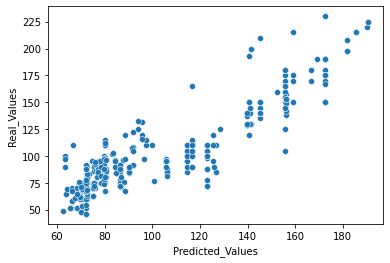

In [12]:
#Using a seaborn scatterplot to visualize model performance
sns.scatterplot(x="Predicted_Values",y="Real_Values",data=pred_real_df,ci=None)
plt.show()

The data points did not scatter around that much. This is nice. It means that our model's predictions did not stray far away from real values.

Well this was fun, right? Let's do this all on two other variables to comprehend it better.

# Same Thing, Different Variables (But Why?)

Because the first time, we did it on variables that were positively correlated. Now, let's see how it works on variables that are negatively correlated. Plus, when it's ML, extra practice won't hurt.

We will use the data on weight to predict miles per gallon (mpg) performance.

##  Linear regression, visualized

Let's see how a regression plot works on two variables that have a negative correlation

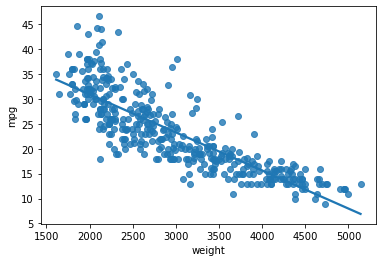

In [13]:
#Seaborn regplot
sns.regplot(x="weight",y="mpg",data=auto_df,ci=None)
plt.show()

Linear regression is not about the direction. In our first work the trend was in positive (up) direction. Now, it's negative (down). This changes nothing. Linear regression still runs on the same formula (y^ = a + bx).

Now, let's go through the same steps with these two different variables.

##  The variables

In [14]:
#X and y values
X = auto_df["weight"].values
y = auto_df["mpg"].values

#Reshape X
X = X.reshape(-1,1)

## Instantiate and fit the model

In [15]:
#Instantiate
model_second = LinearRegression()

In [16]:
#Fit
model_second.fit(X,y)

LinearRegression()

## Make predictions

In [17]:
#Predict
pred_second = model_second.predict(X)

In [18]:
#Predictions vs. real values in a data frame
pred_second_df = pd.DataFrame({"pred_val":pred_second,"real_val":y})
pred_second_df.head(10)

,pred_val,real_val
0,22.211516,18.0
1,10.029300,9.0
2,32.451308,36.1
3,19.259642,18.5
4,29.484139,34.3
5,26.218724,32.9
6,28.895294,32.2
7,27.014047,22.0
8,13.371188,15.0
9,19.840840,17.0


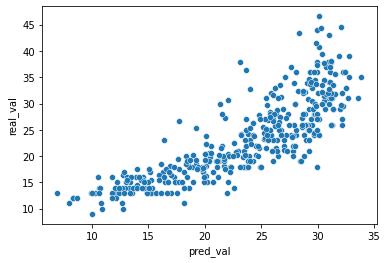

In [19]:
#Visualizing the results
sns.scatterplot(x="pred_val",y="real_val",data=pred_second_df,ci=None)
plt.show()

This looks quite nice. The data points are positioned tightly. Our predictions did not stray away from real values that much.

# What's next?

In the following chapter, we will see how we can use linear regression models with more than one X variable.